In [86]:
#Target: Our target is to build a model which can predict whether or not a customer is going to churn or not.

In [87]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
#Importing the data
df=pd.read_excel('Churn-Dataset.xlsx')

In [89]:
#Basic Analysis of data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [90]:
#checking the data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [91]:
#Summary Stats Check
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,0.52,0.42
std,0.37,24.56,30.09,1.28,1.25
min,0.00,0.00,18.25,0.00,0.00
25%,0.00,9.00,35.50,0.00,0.00
50%,0.00,29.00,70.35,0.00,0.00
75%,0.00,55.00,89.85,0.00,0.00
max,1.00,72.00,118.75,5.00,9.00


In [92]:
#Shape checking
df.shape

(7043, 23)

In [93]:
#installing data_quality_tests module
!pip install data-quality-tests

In [94]:
#Check for Data Quality using DataQuality Function from data-quality-tests module
from data_quality_tests import DataQuality as dq

In [95]:
#Let's check the data quality
dq.data_quality_check(df)

[=================================================================]


TEST CASE NULL VALUES: Passed

TEST CASE DUPLICATE VALUES: Passed

TEST CASE DTYPE MATCHING: Passed

TEST CASE OUTLIERS: Failed

TEST CASE COLUMN HEADER WHITESPACES: Passed

------------------------------------------------------------
[=================================================================]


### Manual check for Data Quality

In [96]:
#check for duplicate values
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn


In [97]:
#No duplicate value is present in our dataset

In [98]:
#Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [99]:
#No missing values present in our dataset

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
#From the above list, we can see that "TotalCharges" column is "object" type which is not correct.
#The data type should be "float" as it contains floating point values.

In [102]:
#Check for the DataTypes
assert df['TotalCharges'].dtype=='float64'

AssertionError: 

In [ ]:
df['TotalCharges'].dtype

In [ ]:
#Let's check the "TotalCharges" data and fix the datatype issue.

In [ ]:
df['TotalCharges'].head()

In [ ]:
df['TotalCharges'].values

In [103]:
#Let's try to convert the data type from 'object' to 'float'
df['TotalCharges'].astype('float64')

ValueError: could not convert string to float: ''

- From the error we can understand that there are some strings which are empty
- ***Let's handle them by replacing them with the null values.***

In [104]:
#Let's find out the empty strings first
df[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


In [105]:
#We can see that there are 11 rows where the Total Charges values are empty.

In [106]:
#Convert the character objects into numerical objects
#If convertation is falied replace that particular item with Null Values.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [107]:
#Check for Null Values
df['TotalCharges'].isnull().sum()

11

In [108]:
#As we have 7043 data inputs that is why we can drop the rows with null values for better the better analysis of the data.
df.dropna(axis=0,inplace=True)

In [109]:
#check for the missing values
df['TotalCharges'].isnull().sum()

0

In [110]:
#Null values are removed

In [111]:
#Check the latest dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [112]:
#Data Type Issue has been fixed

In [113]:
#Check for the Outliers using outlier_columns function from Data Quality Library.
dq.outlier_columns(df)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [114]:
#Hence we can see that for the above three columns we have outliers.
#We have seen the same when we checked the summary stats of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30,0.51,0.42
std,0.37,24.55,30.09,2266.77,1.27,1.25
min,0.00,1.00,18.25,18.80,0.00,0.00
25%,0.00,9.00,35.59,401.45,0.00,0.00
50%,0.00,29.00,70.35,1397.47,0.00,0.00
75%,0.00,55.00,89.86,3794.74,0.00,0.00
max,1.00,72.00,118.75,8684.80,5.00,9.00


In [115]:
#Hypothesis: The data has outliers but these outliers are not too much significant except for the TotalCharges feature

In [116]:
sns.set_style('darkgrid')

<AxesSubplot:ylabel='tenure'>

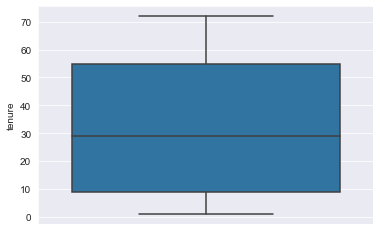

In [117]:
#Let's test our hypothesis
sns.boxplot(y=df['tenure'])

In [118]:
#No significant outliers are present

<AxesSubplot:ylabel='MonthlyCharges'>

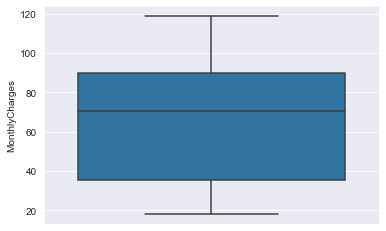

In [119]:
sns.boxplot(y=df['MonthlyCharges'])

In [120]:
#No significant outliers are present

<AxesSubplot:ylabel='TotalCharges'>

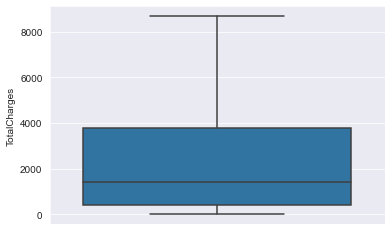

In [121]:
sns.boxplot(y=df['TotalCharges'])

In [122]:
#Here is also no significant outliers are present

In [123]:
#Let's check through numerical analysis

In [124]:
quartile_1=df['TotalCharges'].quantile(.25)
quartile_3=df['TotalCharges'].quantile(.75)

In [125]:
iqr=quartile_3-quartile_1

In [126]:
max_lim=quartile_3+1.5*iqr
min_lim=quartile_1-1.5*iqr

In [127]:
max_lim

8884.66875

In [128]:
min_lim

-4688.481250000001

In [129]:
#No min_lim outliers we have in our dataset

In [130]:
#let's check upper limit outliers
df[df['TotalCharges']>=max_lim]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn


In [131]:
df['TotalCharges'].max()

8684.8

In [132]:
#Interesting Fact: Our data set does not have any significant outliers.

In [133]:
#No outlier treatment is required

In [134]:
#Let's check if any of the column names have WhiteSpace
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [135]:
#No White spaces in the column names are present. If there were WhiteSpaces in the column name then we must rename those features
# By CamelCase(TotalCharges) format or replace white spaces with underscore
# White Spaces in Feature Names can cause various issues while the numerical analysis of the data like numerical characters can
# be mapped as String Characters which is not acceptable at all.
# Accessing the Features beocmes difficult when there are white spces in the feature names.

#Our dataset is following CamelCase naming convension. Hence we do not need to handel the White Spaces.

<AxesSubplot:>

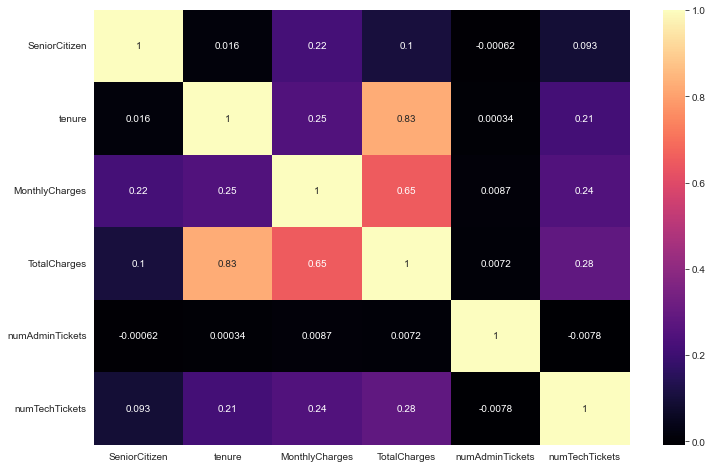

In [136]:
#Let's check the multicolienearity
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='magma',annot=True)


In [137]:
#TotalCharges and Tenure are corelated to each other but not too much
#Same goes for, TotalCharges and MonthlyCharges

#Let's not drop the colinear features and check the performance of our model if it is getting impacted or not.

In [138]:
#Now our dataset is cleaned and we are going to use this clean data for our task
df.to_csv('clean_churn_data.csv',index=False)

In [139]:
#Let's take a backup of our data.
import copy

In [140]:
df_backup=copy.deepcopy(df)

### Model Building

In [141]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [142]:
#As customer id is unique for each record. Hence dropping this column for our analysis
#Churn is our target feature
X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets']]
y=df['Churn']

In [143]:
#There are lots of categorical features in our dataset and before we build our prediction model 
#we need to handle the categorical features

In [144]:
#Let's check how many unique categories our features have
X.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
numAdminTickets        6
numTechTickets        10
dtype: int64

In [145]:
#As there are not too many unique categories in our categorical features which is why we can safely use LabelEncoder
#for handling the categorical features.

In [146]:
#import LableEncoder
from sklearn.preprocessing import LabelEncoder

In [147]:
#let's create an object of LableEncoder module
le=LabelEncoder()

In [148]:
#Let's apply Lable Encoding to the categorical features of the Independent Feature dataset

for i in X.select_dtypes(include='object').columns:
    X[i]=le.fit_transform(X[i])

In [149]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,0,0
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1990.50,0,0
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,7362.90,0,5
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,346.45,0,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,306.60,0,0


In [150]:
#Now let's lable encode our target feature
y=le.fit_transform(y)

In [151]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [152]:
#Now our data is almost ready to feed into our model. Hence, let's first split our data into training and testing set
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
#We can see that Tenure, MonthCharges,TotalCharges and remaining encoded features are in different scale.
#To make our model faster we need to bring down all the features into the same scale.

In [155]:
#importing StandardScalar module
from sklearn.preprocessing import StandardScaler

In [156]:
#Create a StandardScalar Object
scalar=StandardScaler()

In [157]:
#Let's fit_transform our training data
X_train=scalar.fit_transform(X_train)

In [158]:
#To avoid data leakage we only transform the test data using the statistics of training data
X_test=scalar.transform(X_test)

> We are dealing with a classification problem and we can run various Classification algorithms on our data to findout which algorithm is performing comparetively better than other algorithms. Instead of testing our data of multiple algorithms we can use a Library called **"LazyPredict".**

In [159]:
#Basically this Library runs multiple models on our data and gives a list of performance for various models. 
#From the table we can choose our desired model based on their performance.
#However, there will be still scope for HyperParameter Tunning to improve model's performance.

In [160]:
from lazypredict.Supervised import LazyClassifier

In [161]:
lc=LazyClassifier(verbose=0,ignore_warnings=True)#will not get unnecessary text message and warnings will get ignored

In [162]:
models,predictions=lc.fit(X_train, X_test, y_train, y_test )
models

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:08<00:00,  3.42it/s]

[23:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.10it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.82,0.82,0.82,0.83,0.02
GaussianNB,0.79,0.80,0.80,0.80,0.02
LGBMClassifier,0.85,0.80,0.80,0.85,0.09
AdaBoostClassifier,0.85,0.79,0.79,0.85,0.23
CalibratedClassifierCV,0.85,0.79,0.79,0.85,0.95
LogisticRegression,0.85,0.79,0.79,0.85,0.03
LinearSVC,0.85,0.79,0.79,0.85,0.24
XGBClassifier,0.84,0.79,0.79,0.84,0.34
RandomForestClassifier,0.85,0.78,0.78,0.85,0.42


In [163]:
#RandomForest or Logistic Regression is performing well(Among the known algorithms to me)
#Let's go with Logistic Regression

In [164]:
#import Logistic Regression module
from sklearn.linear_model import LogisticRegression

In [165]:
#create a object of the module
lr=LogisticRegression()

In [166]:
#let's fit out training data
lr.fit(X_train,y_train)

LogisticRegression()

In [167]:
pred=lr.predict(X_test)

In [168]:
pred

array([0, 0, 1, ..., 0, 0, 0])

### Model's Performance Evaluation

In [169]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [170]:
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1033
           1       0.74      0.67      0.70       374

    accuracy                           0.85      1407
   macro avg       0.81      0.79      0.80      1407
weighted avg       0.85      0.85      0.85      1407

0.8493248045486852


Text(0.5, 1.0, 'Confusion Matrix')

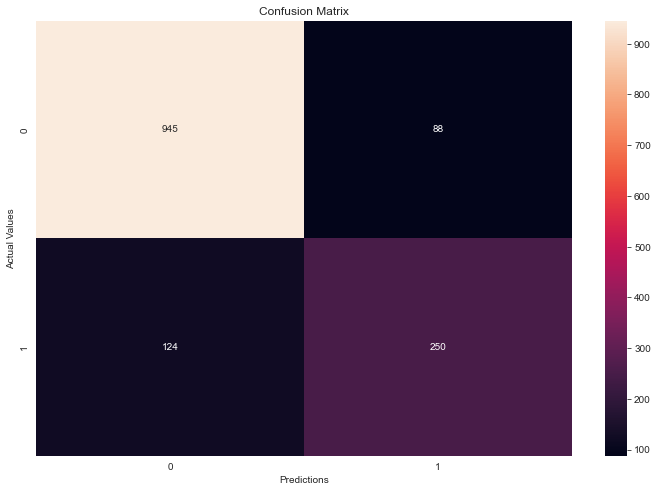

In [171]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [172]:
lr.score(X_test,y_test)

0.8493248045486852

### Hyper-Parameter Tunning

In [173]:
#Let's test if we can improve our model's performance by hyperparameter tunning or not.

In [174]:
#Let's define the hyperparameters and their possible values
parameters={
    'penalty':['l1', 'l2'],
    'C':[0.01,0.1,1,10,100]
}

In [175]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [176]:
#Let's create a Grid Search Object(Cross Validation 5 times(folds))
grid_obj=GridSearchCV(estimator=lr,param_grid=parameters,cv=5)

In [177]:
#Let's fit the Grid Search Object to the training data
grid_obj.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [178]:
#Find out best estimator
grid_obj.best_estimator_

LogisticRegression(C=1)

In [179]:
#let's find out best parameters
print('Best Hyperparameters: ',grid_obj.best_params_)

Best Hyperparameters:  {'C': 1, 'penalty': 'l2'}


In [180]:
#Let's make predictions on the testing data using the best parameters
new_pred=grid_obj.predict(X_test)

In [181]:
#Let's check model's performance after using best parameters
print(grid_obj.score(X_test,y_test))


0.8493248045486852


In [182]:
#let's check the accuracy score
print(accuracy_score(y_test,new_pred))

0.8493248045486852


In [183]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1033
           1       0.74      0.67      0.70       374

    accuracy                           0.85      1407
   macro avg       0.81      0.79      0.80      1407
weighted avg       0.85      0.85      0.85      1407



Text(0.5, 1.0, 'Confusion Matrix')

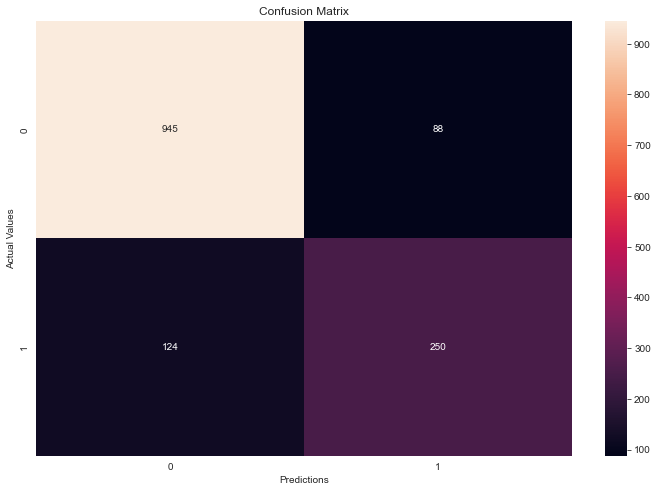

In [184]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,new_pred),annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

### FN2=117,FN1=115(Result of Previous test)

> We can see that after the hyper parameter tunning the number of FN cases have increased. Hence it is better not to go with the Hyperparameter tunning.
> ***Our target is to reduce the FN cases. Because, if our model is predicting a customer is not going to churn but in reality the customer churns then it would be a FATAL situation which we want to avoid.***


### FN1=FN2=124
> We could not see any improvent on our model's performance.

In [209]:
#Serializing our classifier for model building
import pickle

In [210]:
pickle.dump(grid_obj,open('predictive_model.pkl','wb'))

### Preparing the Dataset for Analysis

In [185]:
grid_obj.predict([X_train[25]])

array([0])

In [186]:
y_train[25]

0

In [187]:
#import RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier

In [188]:
rf=RandomForestClassifier()

In [189]:
#scaledown all the features first
bi_scaled_data=scalar.fit_transform(X)

In [190]:
rf.fit(bi_scaled_data,y)

RandomForestClassifier()

In [191]:
rf.score(X_test,y_test)

0.9815209665955935

In [192]:
rf.predict_proba(bi_scaled_data)

array([[0.74, 0.26],
       [0.99, 0.01],
       [0.25, 0.75],
       ...,
       [0.89, 0.11],
       [0.08, 0.92],
       [1.  , 0.  ]])

In [193]:
rf.predict_proba(bi_scaled_data)[:,0]

array([0.74, 0.99, 0.25, ..., 0.89, 0.08, 1.  ])

In [194]:
#backup data
new_df=copy.deepcopy(df)

In [195]:
#adding new columns in dataset
new_df['pred_proba_no']=rf.predict_proba(bi_scaled_data)[:,0]
new_df['pred_proba_yes']=rf.predict_proba(bi_scaled_data)[:,1]

In [196]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,pred_proba_no,pred_proba_yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No,0.74,0.26
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,0,0,No,0.99,0.01
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes,0.25,0.75
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No,0.91,0.09
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes,0.11,0.89


In [197]:
def risk_cat(a):
    if a<=.2:
        return "Non Risky"
    elif a<=.4:
        return "Low Risky"
    elif a<=.6:
        return 'Risky'
    else:
        return "High Risky"

In [198]:
new_df['Risk Category']=new_df['pred_proba_yes'].apply(lambda a:risk_cat(a))

In [199]:
new_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,pred_proba_no,pred_proba_yes,Risk Category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,0,0,No,0.74,0.26,Low Risky
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,0,0,No,0.99,0.01,Non Risky
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,0,0,Yes,0.25,0.75,High Risky
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,0,3,No,0.91,0.09,Non Risky
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,0,0,Yes,0.11,0.89,High Risky
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,99.65,820.50,0,0,Yes,0.02,0.98,High Risky
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,Credit card (automatic),89.10,1949.40,0,0,No,0.90,0.10,Non Risky
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,Mailed check,29.75,301.90,0,0,No,0.97,0.03,Non Risky
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,104.80,3046.05,0,2,Yes,0.04,0.96,High Risky
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,Bank transfer (automatic),56.15,3487.95,0,0,No,0.99,0.01,Non Risky


In [204]:
new_df[new_df['Risk Category']=='High Risky']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,pred_proba_no,pred_proba_yes,Risk Category
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,0,0,Yes,0.25,0.75,High Risky
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,0,0,Yes,0.11,0.89,High Risky
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,99.65,820.50,0,0,Yes,0.02,0.98,High Risky
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,104.80,3046.05,0,2,Yes,0.04,0.96,High Risky
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Bank transfer (automatic),103.70,5036.30,5,4,Yes,0.10,0.90,High Risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,Yes,Electronic check,59.80,727.80,0,0,Yes,0.29,0.71,High Risky
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,Yes,Bank transfer (automatic),44.20,403.35,4,0,Yes,0.30,0.70,High Risky
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,75.75,75.75,0,0,Yes,0.00,1.00,High Risky
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Credit card (automatic),102.95,6886.25,0,7,Yes,0.10,0.90,High Risky


In [205]:
def tenure_bucket(a):
    if a>=0 and a<=20:
        return '0-20'
    elif a>=21 and a<=40:
        return '21-40'
    elif a>=41 and a<=60:
        return '41-60'
    else:
        return '61-100'

In [207]:
new_df['tenure_bucket']=new_df['tenure'].apply(lambda a:tenure_bucket(a))

In [208]:
new_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,pred_proba_no,pred_proba_yes,Risk Category,tenure_bucket
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Electronic check,29.85,29.85,0,0,No,0.74,0.26,Low Risky,0-20
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.50,0,0,No,0.99,0.01,Non Risky,21-40
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,0,0,Yes,0.25,0.75,High Risky,0-20
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,0,3,No,0.91,0.09,Non Risky,41-60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,0,0,Yes,0.11,0.89,High Risky,0-20
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Electronic check,99.65,820.50,0,0,Yes,0.02,0.98,High Risky,0-20
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Credit card (automatic),89.10,1949.40,0,0,No,0.90,0.10,Non Risky,21-40
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,Mailed check,29.75,301.90,0,0,No,0.97,0.03,Non Risky,0-20
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Electronic check,104.80,3046.05,0,2,Yes,0.04,0.96,High Risky,21-40
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,Bank transfer (automatic),56.15,3487.95,0,0,No,0.99,0.01,Non Risky,61-100


In [211]:
#We have created our final data set which we are going to use for our analysis.
new_df.to_csv('final_churn_data.csv',index=False)